# What is Computer Vision (CV)?

# What a Computer actually sees?

# Why Deep Neural Network for Images?

In [1]:
# !gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

# Import Libraries

In [2]:
# Import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

In [3]:
class_dirs = os.listdir("/Users/abhishekmishra/Downloads/Datasets/clothing-dataset-small/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/Users/abhishekmishra/Downloads/Datasets/clothing-dataset-small/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

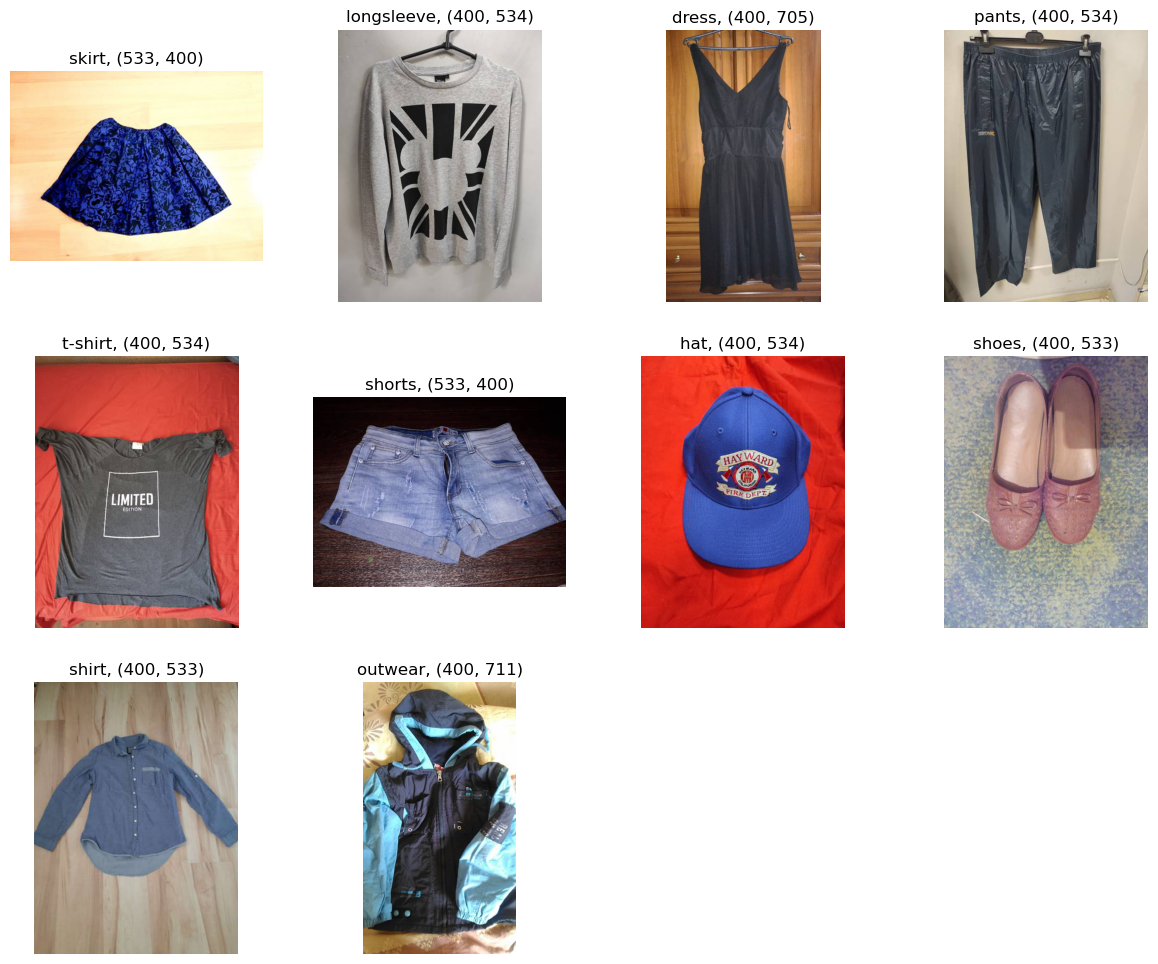

In [4]:
## Viz Random Sample from each class

plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

Count of training samples per class:
         class  count
0       skirt    112
1  longsleeve    455
2       dress    241
3       pants    468
4     t-shirt    795
5      shorts    202
6         hat    123
7       shoes    198
8       shirt    290
9     outwear    184


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

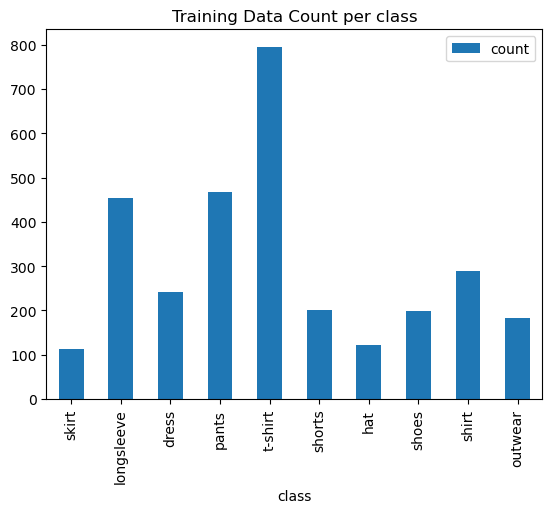

In [5]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

# Preprocessing

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory('/Users/abhishekmishra/Downloads/Datasets/clothing-dataset-small/train',shuffle=True)

val_data = tf.keras.utils.image_dataset_from_directory('/Users/abhishekmishra/Downloads/Datasets/clothing-dataset-small/validation',shuffle = False)

test_data = tf.keras.utils.image_dataset_from_directory('/Users/abhishekmishra/Downloads/Datasets/clothing-dataset-small/test',shuffle = False)

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


# Shape Preprocessing (Resizing)

# Value Preprocessing (Rescaling)

# Shape Preprocessing for MLPs (Flatten)

In [7]:
height, width = 128, 128 # Optional, not required if we already have resized the data from `image_dataset_from_directory` function.

# Data Processing Stage with resizing and rescaling operations
data_preprocess_with_flatten = keras.Sequential(
    name = "data_preprocess_with_flatten",
    layers = [
        layers.Resizing(height, width),
        layers.Rescaling(1./255),
        layers.Flatten(), # Note: We prefer NOT to add `layers.Flatten()` as part of preprocessing layers (rather as model definition itself)!
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess_with_flatten(x), y))

In [8]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 49152), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
sample = next(iter(train_ds))[0]

print(sample)

tf.Tensor(
[[0.09552696 0.08768383 0.09944853 ... 0.5103711  0.47507697 0.4084103 ]
 [0.19276579 0.04910769 0.06562117 ... 0.4493935  0.12782486 0.18272682]
 [0.63098645 0.5407904  0.6113786  ... 0.93143386 0.939277   0.9353554 ]
 ...
 [0.49344397 0.49344397 0.46207142 ... 0.19694066 0.19694066 0.1655681 ]
 [0.54509807 0.43921572 0.2627451  ... 0.81038606 0.73587626 0.5672488 ]
 [0.15490197 0.04509804 0.10000001 ... 0.2515235  0.07401124 0.13448918]], shape=(32, 49152), dtype=float32)


In [10]:
data_preprocess = keras.Sequential(
name = 'data_preprocess',
layers = [
    layers.Resizing (height,width),
    layers.Rescaling(1.0/255),
])

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

# Training Neural Network

In [11]:
num_classes = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)), # alternatively, input_shape=next(iter(train_ds))[0].shape[1:]
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

In [12]:
model.summary()

Model: "model_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 50597642 (193.01 MB)
Trainable params: 50597642 (193.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


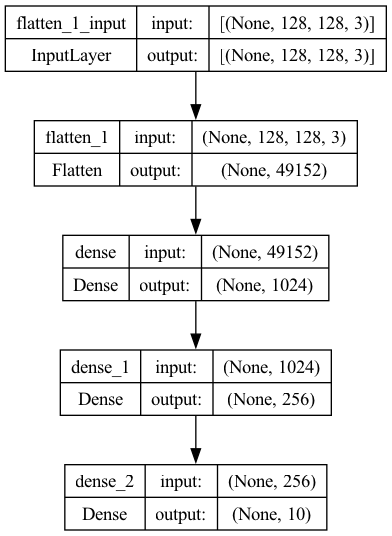

In [13]:
tf.keras.utils.plot_model(model, to_file="model_ann.png", show_shapes=True)

# Loss Function and Optimizer

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training and Evaluation with Vanilla NN

In [15]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
96/96 [==============================] - 5s 49ms/step - loss: 14.2698 - accuracy: 0.2389 - val_loss: 2.2786 - val_accuracy: 0.3402
Epoch 2/10
96/96 [==============================] - 5s 49ms/step - loss: 2.3551 - accuracy: 0.3409 - val_loss: 3.1406 - val_accuracy: 0.3109
Epoch 3/10
96/96 [==============================] - 5s 50ms/step - loss: 2.1222 - accuracy: 0.3768 - val_loss: 2.1750 - val_accuracy: 0.3988
Epoch 4/10
96/96 [==============================] - 5s 53ms/step - loss: 1.7649 - accuracy: 0.4560 - val_loss: 1.6751 - val_accuracy: 0.4487
Epoch 5/10
96/96 [==============================] - 5s 53ms/step - loss: 1.6243 - accuracy: 0.4831 - val_loss: 1.6663 - val_accuracy: 0.4575
Epoch 6/10
96/96 [==============================] - 5s 51ms/step - loss: 1.5881 - accuracy: 0.4928 - val_loss: 1.9795 - val_accuracy: 0.3783
Epoch 7/10
96/96 [==============================] - 5s 52ms/step - loss: 1.5955 - accuracy: 0.4886 - val_loss: 1.8178 - val_accuracy: 0.4252
Epoch 8/10
9

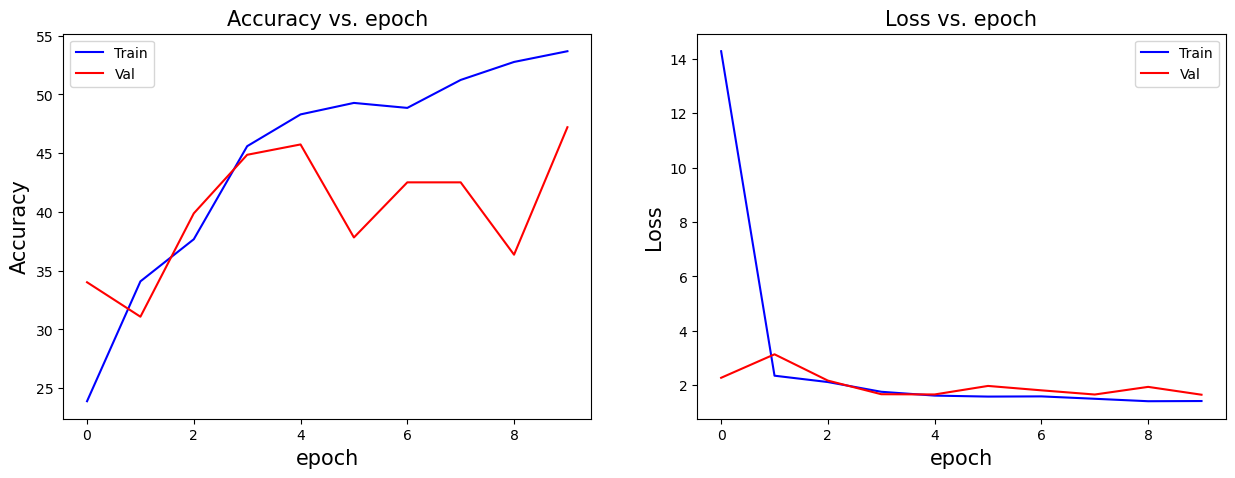

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [18]:
# load model from pretrained checkpoints (optional)
# model.load_weights("/content/Saved Models/L1_ann_model.ckpt")

# run model prediction and obtain probabilities
y_pred = model.predict(test_ds)

# get list of predicted classes by taking argmax of the probabilities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# get list of class names
class_names = test_data.class_names

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x, y in test_ds], axis=0)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

12/12 [==============================] - 0s 16ms/step

Test Accuracy: 38.98%



In [19]:
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    # run model prediction and obtain probabilities
    y_pred = model.predict(ds)
    # get list of predicted classes by taking argmax of the probabilities(y_pred)
    predicted_categories = tf.argmax(y_pred, axis=1)
    # create list of all "y"s labels, by iterating over test dataset
    true_categories = tf.concat([y for x, y in ds], axis=0)
    # generate confusion matrix and plot it
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

12/12 [==============================] - 0s 16ms/step


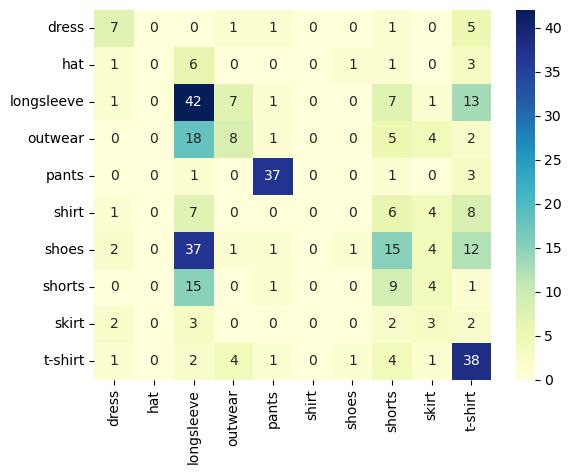

In [20]:
ConfusionMatrix(model, test_ds, test_data.class_names)

In [21]:
# function to plot image given image, its true label and class probabilities (pred_array)
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                class_names[true_label]),
                                color=color)

# function to plot barplot of class probabilities (pred_array)
def plot_value_array(pred_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

12/12 [==============================] - 0s 16ms/step


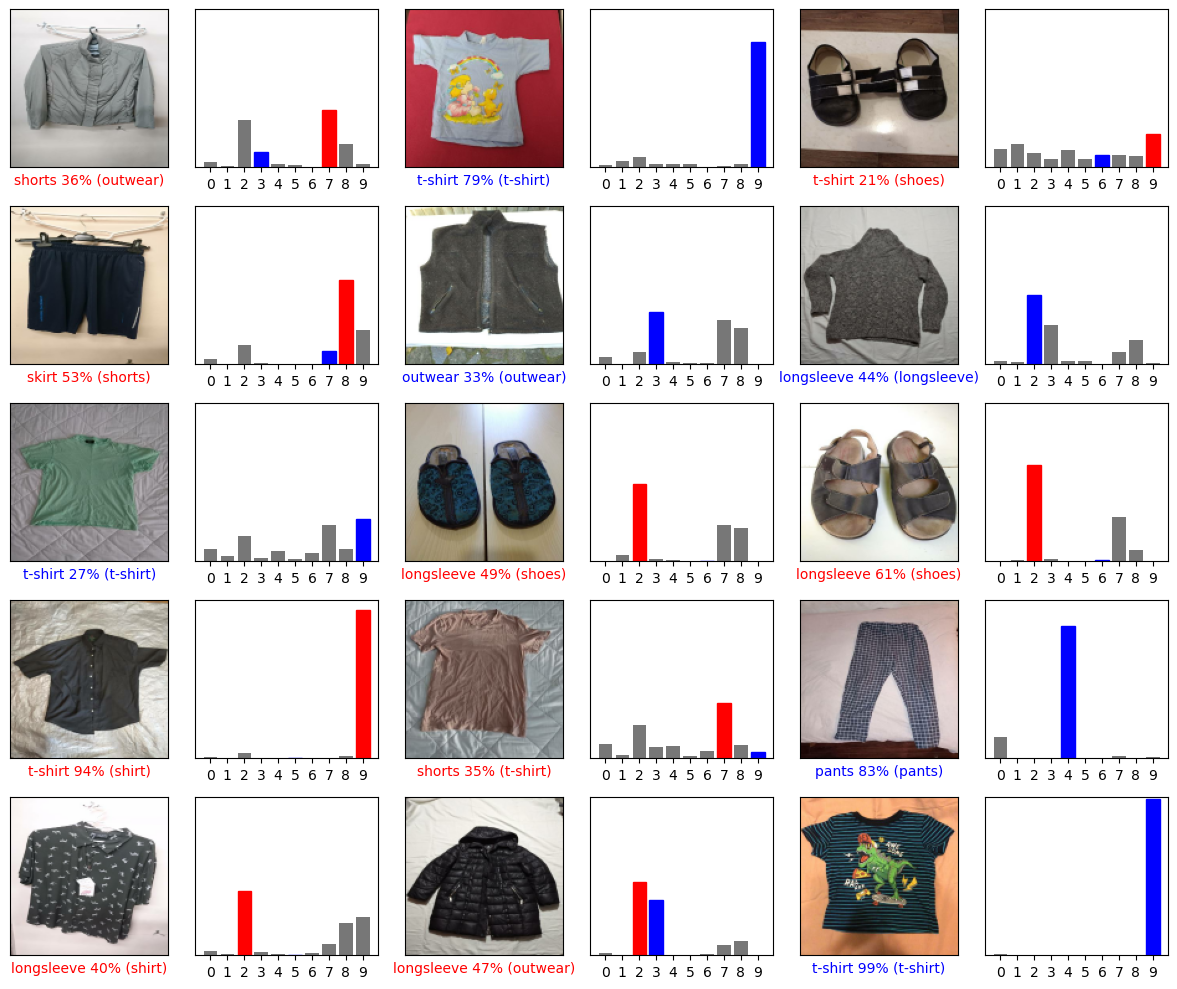

In [22]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(y_pred[index], true_categories[index], images[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(y_pred[index], true_categories[index])
plt.tight_layout()
plt.show()

# Replacing Vanilla NN with CNNs

In [25]:
num_classes = 10
hidden_size = 256

model = keras.Sequential(
    name = 'model_cnn',
    layers = [
        layers.Conv2D(filters =16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(height,width,3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=hidden_size,activation='relu'),
        layers.Dense(units=num_classes,activation='softmax')
        
        
    ]
)

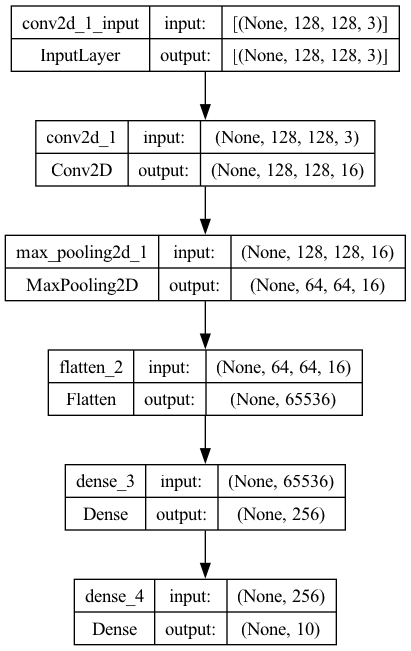

In [26]:
tf.keras.utils.plot_model(model,to_file='model_cnn.png',show_shapes=True)

In [27]:
model.summary()

Model: "model_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16780490 (64.01 MB)
Trainable params: 16780490 (64.01 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training and Evaluation with CNNs

In [29]:
epochs = 10
model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
96/96 [==============================] - 4s 36ms/step - loss: 2.7922 - accuracy: 0.2995 - val_loss: 1.7974 - val_accuracy: 0.3871
Epoch 2/10
96/96 [==============================] - 4s 36ms/step - loss: 1.4268 - accuracy: 0.5508 - val_loss: 1.5035 - val_accuracy: 0.5103
Epoch 3/10
96/96 [==============================] - 4s 36ms/step - loss: 0.9379 - accuracy: 0.7053 - val_loss: 1.4007 - val_accuracy: 0.5513
Epoch 4/10
96/96 [==============================] - 4s 36ms/step - loss: 0.5637 - accuracy: 0.8422 - val_loss: 1.3738 - val_accuracy: 0.5630
Epoch 5/10
96/96 [==============================] - 4s 36ms/step - loss: 0.3187 - accuracy: 0.9260 - val_loss: 1.5103 - val_accuracy: 0.5953
Epoch 6/10
96/96 [==============================] - 4s 37ms/step - loss: 0.1663 - accuracy: 0.9703 - val_loss: 1.5988 - val_accuracy: 0.6012
Epoch 7/10
96/96 [==============================] - 4s 36ms/step - loss: 0.0961 - accuracy: 0.9857 - val_loss: 1.5166 - val_accuracy: 0.6100
Epoch 8/10
96

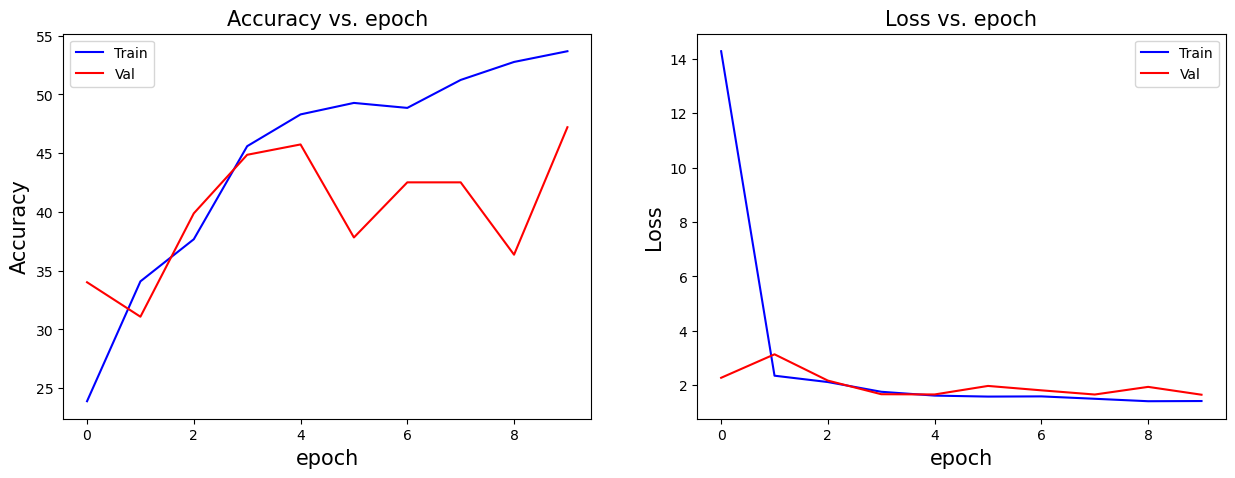

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [32]:
# load model from pretrained checkpoints (optional)
# model.load_weights("/content/Saved Models/L1_cnn_model.ckpt")

true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names
predicted_categories = tf.argmax(y_pred, axis=1)

test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

12/12 [==============================] - 0s 12ms/step

Test Accuracy: 47.31%



12/12 [==============================] - 0s 13ms/step


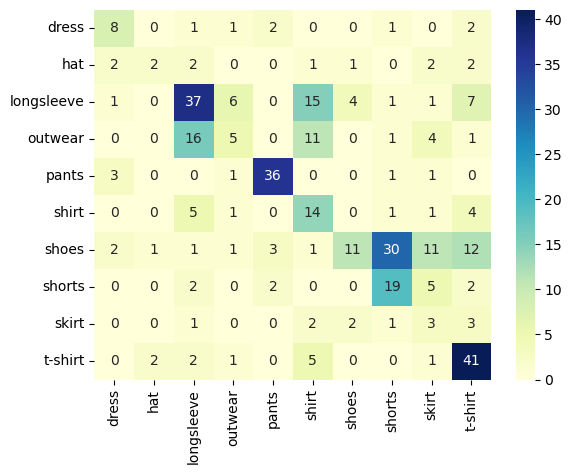

In [33]:
ConfusionMatrix(model, test_ds, test_data.class_names)

12/12 [==============================] - 0s 12ms/step


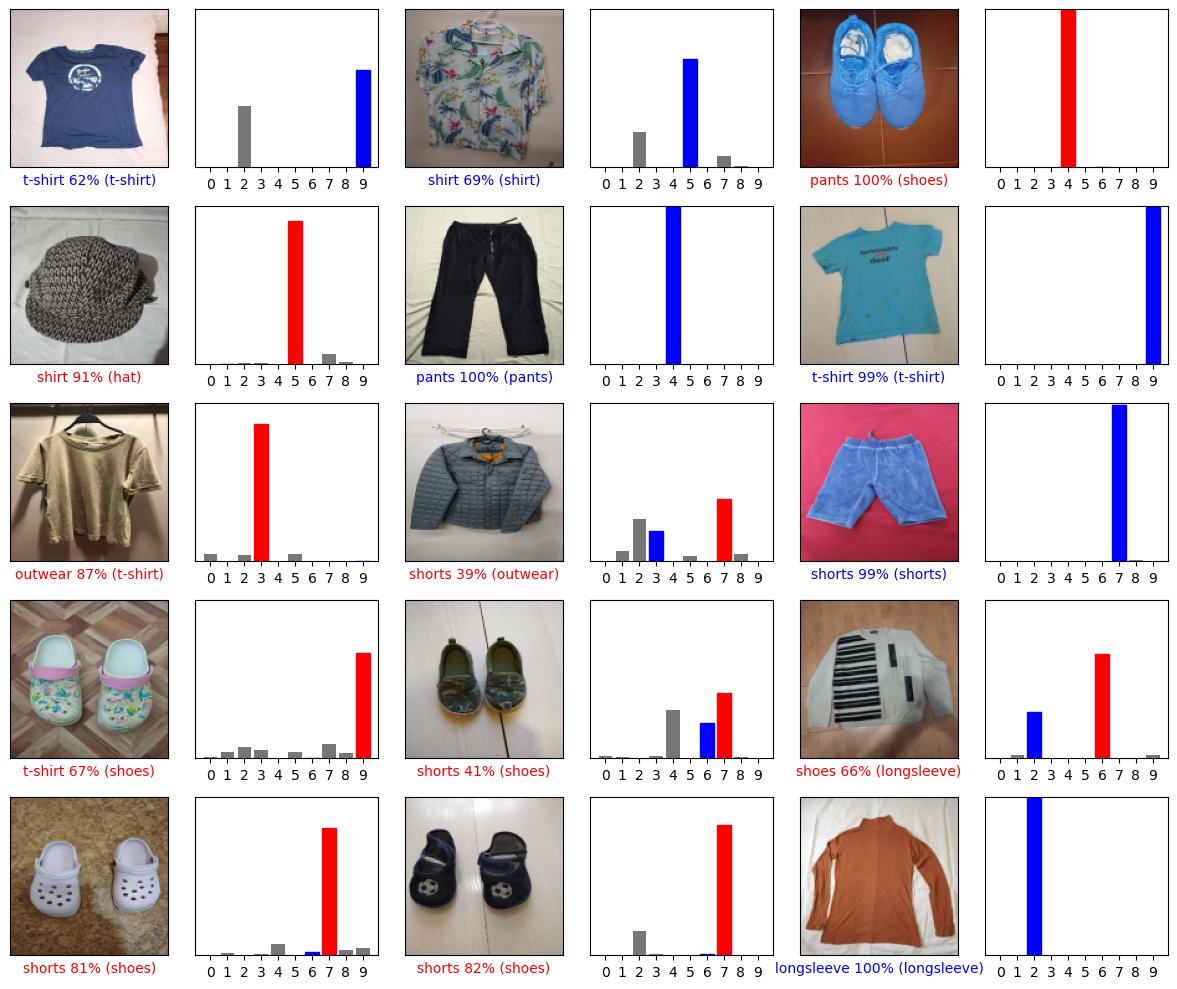

In [34]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(y_pred[index], true_categories[index], images[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(y_pred[index], true_categories[index])
plt.tight_layout()
plt.show()

# Understanding the Screwdriver (CNN)